# Test Program No. 1 (by JJL)
Description:  This code is modeled after the code found at:  https://github.com/rmotr/ml-workshop-image-recognition.  There is an accompanying YouTube video at:  https://www.youtube.com/watch?v=2Q4L3MtdAbY.  Many thanks to those folks!

The program essentially has three components: (1) Capture images using OpenCV to create a custom dataset of images; (2) Train a TensorFlow deep learning model to recognized the images captured; and (3) use OpenCV to capture live images from a webcam and classify the image using the model.

Another branch is being created to divide the three above activities in three separate programs.

******IMPORTANT*********
Camera value below is set to my second webcam, i.e., not my default webcam.  Further comments are included below.
E.g., camera = cv2.VideoCapture(1) versus camera = cv2.VideoCapture(0)
1 = my second webcam
0 = my default webcam (in laptop)

## Activity No. 1:  Capture images to create dataset

Import needed libraries.  Libraries were imported via Anaconda in a newly virtual environment.

In [1]:
import os
import random
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing

%matplotlib inline

Using TensorFlow backend.


Create list of classification names for each of the types of frames to be captured, and save them to proper classification type based on key user clicks (e.g., 1, 2, 3, etc.).

In [2]:
class_names = ['INDEX_UP', 'FIST', 'PALM', 'THUMB_LEFT', 'THUMB_RIGHT', 'FIVE_WIDE']

In [3]:
# Get the reference to the webcam
camera = cv2.VideoCapture(1)     # The passed arg of 1 represents the webcam (second webcam); default is 0 (laptop built-in webcam).
camera_height = 500
raw_frames_type_1 = []           # Each type represents 1 of n types of images
raw_frames_type_2 = []
raw_frames_type_3 = []
raw_frames_type_4 = []
raw_frames_type_5 = []
raw_frames_type_6 = []


while(True):
    # Read a new frame
    _, frame = camera.read()
    
    # Flip the frame
    frame = cv2.flip(frame, 1)

    # Rescale camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # Add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (0, 255, 0), 2)

    # Show the frame
    cv2.imshow("Capturing frames", frame)

    key = cv2.waitKey(1)

    # Wait for user to press a key, at which point program captures static webcam image
    #  and classifies it under one of the n types of classifications depending on which
    #  number user types.  Camera quits collection process if user presses 'q' key.
    #  Program outputs a message indicating number key user typed.
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("1"):
        # save the frame
        raw_frames_type_1.append(frame)
        print('1 key pressed - saved TYPE_1 frame')
    elif key & 0xFF == ord("2"):
        # save the frame
        raw_frames_type_2.append(frame)
        print('2 key pressed - Saved TYPE_2 frame')
    elif key & 0xFF == ord("3"):
        # save the frame
        raw_frames_type_3.append(frame)
        print('3 key pressed - Saved TYPE_3 frame')
    elif key & 0xFF == ord("4"):
        # save the frame
        raw_frames_type_4.append(frame)
        print('4 key pressed - Saved TYPE_4 frame')
    elif key & 0xFF == ord("5"):
        # save the frame
        raw_frames_type_5.append(frame)
        print('5 key pressed - Saved TYPE_5 frame')
    elif key & 0xFF == ord("6"):
        # save the frame
        raw_frames_type_6.append(frame)
        print('6 key pressed - Saved TYPE_6 frame')     

camera.release()
cv2.destroyAllWindows()

1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - save

5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Saved TYPE_5 frame
5 key pressed - Save

Crop OpenCV Rectangular Range of Interest (ROI) from frames, and resize to 399 x 399.

In [4]:
save_width = 399
save_height = 399

Loop through each of the classifications, create a subdirectory for each one, and save images to proper folder.

In [5]:
for i in range(1, 7):
    name = './data/images_type_{}'.format(i)
    os.makedirs(name, exist_ok=True)

In [6]:
for i, frame in enumerate(raw_frames_type_1):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_1/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_2):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_2/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
    
for i, frame in enumerate(raw_frames_type_3):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_3/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_4):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_4/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
    
for i, frame in enumerate(raw_frames_type_5):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_5/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
    
for i, frame in enumerate(raw_frames_type_6):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_6/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

Take a moment to confirm that the images were correctly saved to proper folders.  Load images again.

In [7]:
width = 96
height = 96

In [8]:
# Reimport libraries (although redundant here).
import os
import random
from glob import glob
from keras import preprocessing

In [9]:
def load_images(base_path):
    images = []
    path = os.path.join(base_path, '*.png')
    for image_path in glob(path):
        image = preprocessing.image.load_img(image_path,
                                             target_size=(width, height))
        x = preprocessing.image.img_to_array(image)

        images.append(x)
    return images

In [10]:
images_type_1 = load_images('./data/images_type_1')
images_type_2 = load_images('./data/images_type_2')
images_type_3 = load_images('./data/images_type_3')
images_type_4 = load_images('./data/images_type_4')
images_type_5 = load_images('./data/images_type_5')
images_type_6 = load_images('./data/images_type_6')

Show 7 random type_1 images.

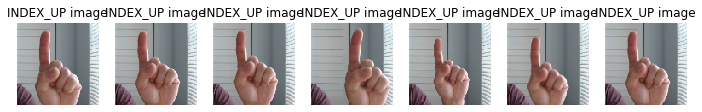

In [11]:
plt.figure(figsize=(12,8))

for i in range(7):
    plt.subplot(1, 7, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_1))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))

# Show the plot.
plt.show()

Show 7 random type_2 images.

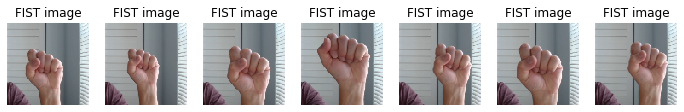

In [12]:
plt.figure(figsize=(12,8))

for i in range(7):
    plt.subplot(1, 7, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_2))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[1]))

# Show the plot
plt.show()

Show 7 random type_3 images.

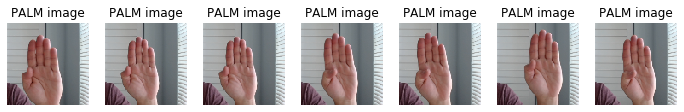

In [13]:
plt.figure(figsize=(12,8))

for i in range(7):
    plt.subplot(1, 7, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_3))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[2]))

# Show the plot
plt.show()

Show 7 random type_4 images.

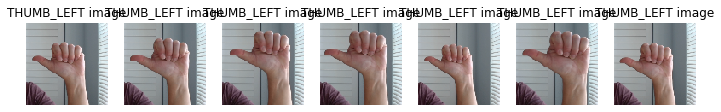

In [14]:
plt.figure(figsize=(12,8))

for i in range(7):
    plt.subplot(1, 7, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_4))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[3]))

# Show the plot
plt.show()

Show 7 random type_5 images.

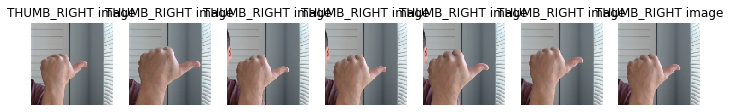

In [15]:
plt.figure(figsize=(12,8))

for i in range(7):
    plt.subplot(1, 7, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_5))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[4]))

# Show the plot
plt.show()

Show 7 random type_6 images.

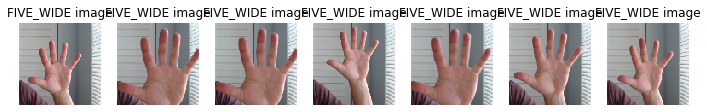

In [16]:
plt.figure(figsize=(12,8))

for i in range(7):
    plt.subplot(1, 7, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_6))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[5]))

# Show the plot
plt.show()

## Activity No. 2:  Train TensorFlow deep learning model.

Prepare images as tensors.

In [17]:
X_type_1 = np.array(images_type_1)
X_type_2 = np.array(images_type_2)
X_type_3 = np.array(images_type_3)
X_type_4 = np.array(images_type_4)
X_type_5 = np.array(images_type_5)
X_type_6 = np.array(images_type_6)

print(X_type_1.shape)
print(X_type_2.shape)
print(X_type_3.shape)
print(X_type_4.shape)
print(X_type_5.shape)
print(X_type_6.shape)

(48, 96, 96, 3)
(44, 96, 96, 3)
(33, 96, 96, 3)
(36, 96, 96, 3)
(117, 96, 96, 3)
(102, 96, 96, 3)


Build one big array containing all the images

In [18]:
X = np.concatenate((X_type_1, X_type_2, X_type_3, X_type_4, X_type_5, X_type_6), axis=0)

Rescale color pixels that original went from 0-255 down to between 0 and 1, which will make the model work better.

In [19]:
X = X / 255.

X.shape

(380, 96, 96, 3)

Create a y_train, using 0 to indiate type_1, and 1 to indicate type_2, etc.

In [20]:
from keras.utils import to_categorical

y_type_1 = [0 for item in enumerate(X_type_1)]
y_type_2 = [1 for item in enumerate(X_type_2)]
y_type_3 = [2 for item in enumerate(X_type_3)]
y_type_4 = [3 for item in enumerate(X_type_4)]
y_type_5 = [4 for item in enumerate(X_type_5)]
y_type_6 = [5 for item in enumerate(X_type_6)]


y = np.concatenate((y_type_1, y_type_2, y_type_3, y_type_4, y_type_5, y_type_6), axis=0)

y = to_categorical(y, num_classes=len(class_names))

print(y.shape)

(380, 6)


### Configure convolutional network.

Create a deep network which will learn our types and then will try to predict them.

In [21]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

# Default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 30
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,
                dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
                dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
                lr=lr):
    model = Sequential()

    model.add(Convolution2D(conv_1, (3, 3),
                            input_shape=(width, height, color_channels),
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_1_drop))

    model.add(Convolution2D(conv_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_2_drop))
        
    model.add(Flatten())
        
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))

    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))

    model.add(Dense(len(class_names), activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])

    return model

In [22]:
import numpy as np
np.random.seed(1)             # For reproducibility

# Model with base parameters
model = build_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

In [23]:
epochs = 20

In [24]:
model.fit(X, y, epochs=epochs)

Epoch 1/20
380/380 [==============================] - 6s 16ms/step - loss: 3.3499 - accuracy: 0.2684
Epoch 2/20
380/380 [==============================] - 6s 15ms/step - loss: 1.7113 - accuracy: 0.3263
Epoch 3/20
380/380 [==============================] - 6s 15ms/step - loss: 1.5579 - accuracy: 0.4553
Epoch 4/20
380/380 [==============================] - 6s 15ms/step - loss: 1.2264 - accuracy: 0.5526
Epoch 5/20
380/380 [==============================] - 6s 15ms/step - loss: 0.8348 - accuracy: 0.6947
Epoch 6/20
380/380 [==============================] - 6s 15ms/step - loss: 0.5850 - accuracy: 0.8053
Epoch 7/20
380/380 [==============================] - 6s 16ms/step - loss: 0.3277 - accuracy: 0.8789
Epoch 8/20
380/380 [==============================] - 6s 15ms/step - loss: 0.2293 - accuracy: 0.9053
Epoch 9/20
380/380 [==============================] - 6s 16ms/step - loss: 0.1377 - accuracy: 0.9605
Epoch 10/20
380/380 [==============================] - 6s 15ms/step - loss: 0.0605 - accura

Deep network model has been created and trained.  Now try to test individual images to try to predict using model.  This particular method is a no-no since we are using actual images used to train model, and so it is just an academic exercise.

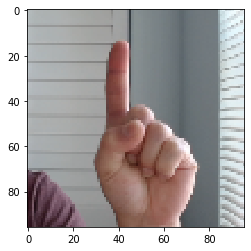

The type predicted is: INDEX_UP


In [25]:
type_1 = preprocessing.image.load_img('./data/images_type_1/0.png',
                                      target_size=(width, height))
plt.imshow(type_1)
plt.show()

type_1_X = np.expand_dims(type_1, axis=0)

predictions = model.predict(type_1_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

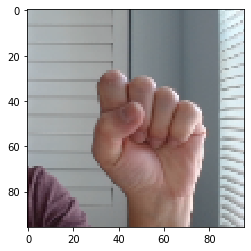

The type predicted is: FIST


In [26]:
type_2 = preprocessing.image.load_img('./data/images_type_2/1.png',
                                      target_size=(width, height))
plt.imshow(type_2)
plt.show()

type_2_X = np.expand_dims(type_2, axis=0)

predictions = model.predict(type_2_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

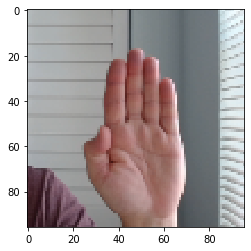

The type predicted is: PALM


In [27]:
type_3 = preprocessing.image.load_img('./data/images_type_3/1.png',
                                      target_size=(width, height))
plt.imshow(type_3)
plt.show()

type_3_X = np.expand_dims(type_3, axis=0)

predictions = model.predict(type_3_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

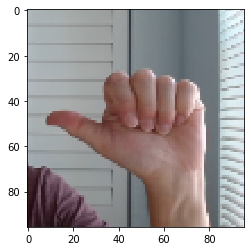

The type predicted is: THUMB_LEFT


In [28]:
type_4 = preprocessing.image.load_img('./data/images_type_4/1.png',
                                      target_size=(width, height))
plt.imshow(type_4)
plt.show()

type_4_X = np.expand_dims(type_4, axis=0)

predictions = model.predict(type_4_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

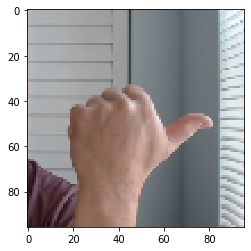

The type predicted is: THUMB_RIGHT


In [29]:
type_5 = preprocessing.image.load_img('./data/images_type_5/1.png',
                                      target_size=(width, height))
plt.imshow(type_5)
plt.show()

type_5_X = np.expand_dims(type_5, axis=0)

predictions = model.predict(type_5_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

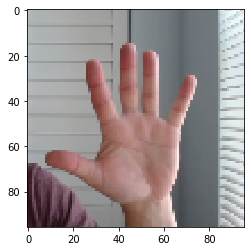

The type predicted is: FIVE_WIDE


In [30]:
type_6 = preprocessing.image.load_img('./data/images_type_6/1.png',
                                      target_size=(width, height))
plt.imshow(type_6)
plt.show()

type_6_X = np.expand_dims(type_6, axis=0)

predictions = model.predict(type_6_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

## Activity No. 3:  Use OpenCV to capture live webcam images and test TensorFlow model predictions.

In [31]:
import time
import pyautogui                        # For keyboard shortcuts
import pydirectinput                    # For keyboard shortcuts


# Get the reference to the webcam
camera = cv2.VideoCapture(1)            # 1 = second webcam; default is 0.
camera_height = 500

#============================================
# Extra temporary pause added for when incorporating pyautogui keyboard
#  shortcuts library
# 
# Time.sleep(5)
#============================================

while(True):
    # Read a new frame
    _, frame = camera.read()
    
    # Flip the frameq
    frame = cv2.flip(frame, 1)

    # Rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # Add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (240, 100, 0), 2)

    # Get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # Parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # Resize
    roi = cv2.resize(roi, (width, height))
    
    # Predict!
    roi_X = np.expand_dims(roi, axis=0)

    predictions = model.predict(roi_X)
    type_1_pred, type_2_pred, type_3_pred, type_4_pred, type_5_pred, type_6_pred  = predictions[0]

    # Add text
    type_1_text = '{}: {}%'.format(class_names[0], int(type_1_pred*100))
    cv2.putText(frame, type_1_text, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # Add text
    tipe_2_text = '{}: {}%'.format(class_names[1], int(type_2_pred*100))
    cv2.putText(frame, tipe_2_text, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    # Add text
    tipe_3_text = '{}: {}%'.format(class_names[2], int(type_3_pred*100))
    cv2.putText(frame, tipe_3_text, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    # Add text
    tipe_4_text = '{}: {}%'.format(class_names[3], int(type_4_pred*100))
    cv2.putText(frame, tipe_4_text, (70, 260), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    # Add text
    tipe_5_text = '{}: {}%'.format(class_names[4], int(type_5_pred*100))
    cv2.putText(frame, tipe_5_text, (70, 290), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    # Add text
    tipe_6_text = '{}: {}%'.format(class_names[5], int(type_6_pred*100))
    cv2.putText(frame, tipe_6_text, (70, 320), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # Show the frame
    cv2.imshow("Test out", frame)

    #=======================================================
    # Below code section is for output to pautogui keyboard shortcuts
    """
    if type_1_pred > 0.90:
        pydirectinput.press('up')
    elif type_2_pred > 0.90:
        pydirectinput.press('+')
    elif type_3_pred > 0.90:
        pass
    elif type_4_pred > 0.90:
        pydirectinput.press('left')
    elif type_5_pred > 0.90:
        pydirectinput.press('right')
    elif type_6_pred > 0.90:
        pydirectinput.press('-')
    """   
   #=======================================================

    key = cv2.waitKey(1)
    
    
    # Quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

Save model for future use.  Can be reloaded and used for predictions.

In [32]:
model.save('pyearth_cnn_model_200612_1744.h5')      # Filename includes date/time saved